In [11]:
import pandas as pd
import numpy as np

%matplotlib inline

/home/ali/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data = pd.read_csv('data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

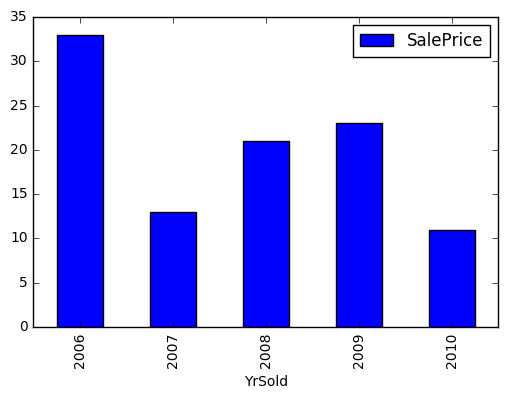

In [19]:
pd.pivot_table(data[data['SaleCondition'] == 'Abnorml'], index=['YrSold'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

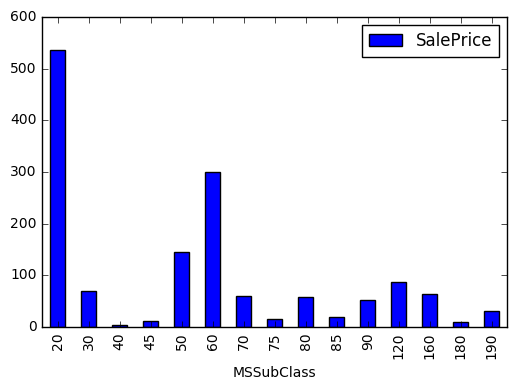

In [20]:
pd.pivot_table(data, index=['MSSubClass'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

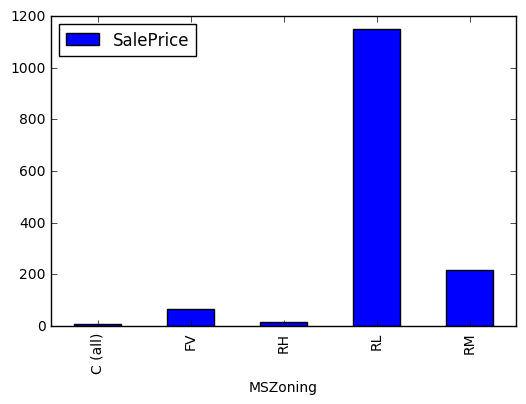

In [21]:
pd.pivot_table(data, index=['MSZoning'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

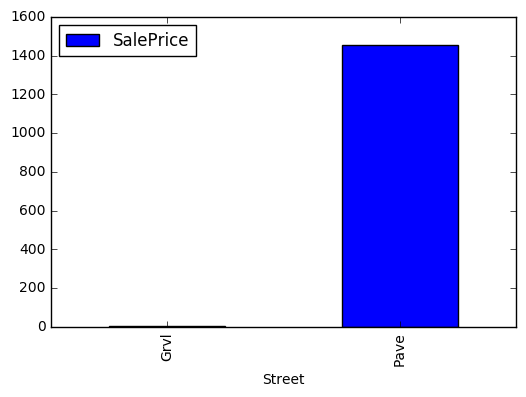

In [23]:
pd.pivot_table(data, index=['Street'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

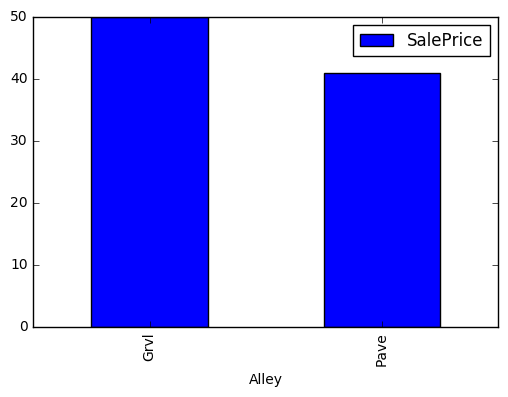

In [24]:
pd.pivot_table(data, index=['Alley'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

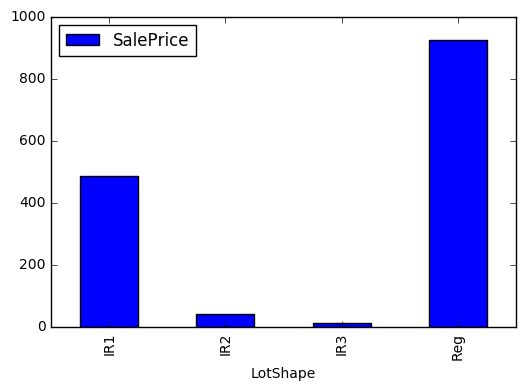

In [25]:
pd.pivot_table(data, index=['LotShape'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

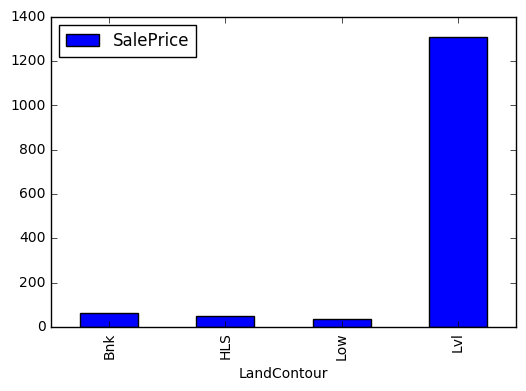

In [26]:
pd.pivot_table(data, index=['LandContour'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

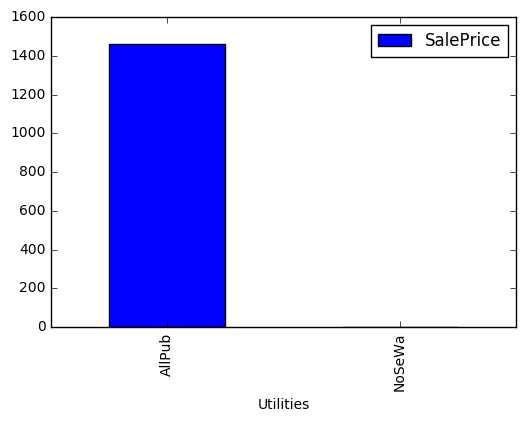

In [27]:
pd.pivot_table(data, index=['Utilities'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

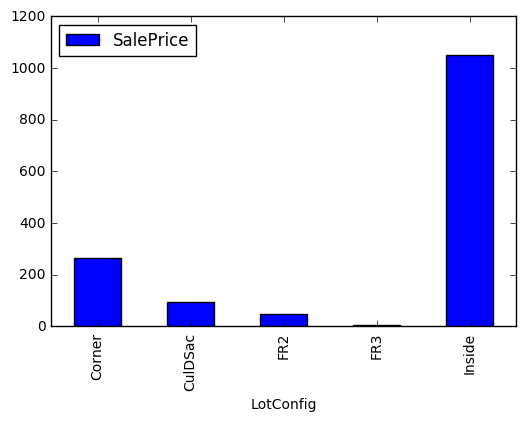

In [28]:
pd.pivot_table(data, index=['LotConfig'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

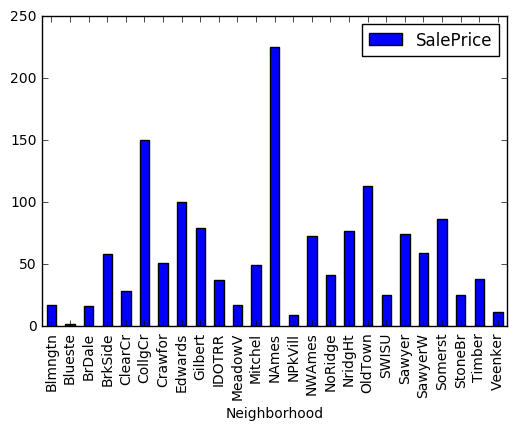

In [29]:
pd.pivot_table(data, index=['Neighborhood'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

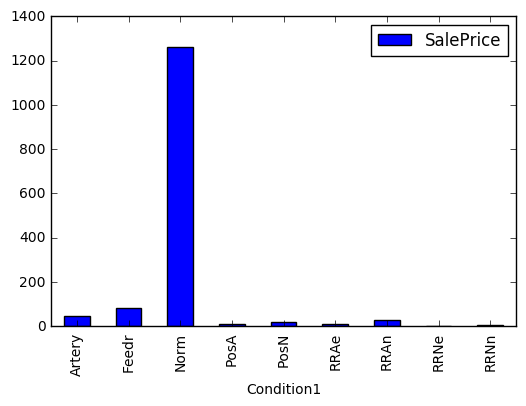

In [30]:
pd.pivot_table(data, index=['Condition1'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

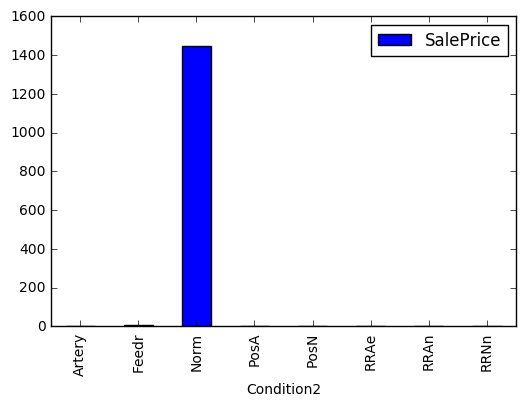

In [31]:
pd.pivot_table(data, index=['Condition2'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

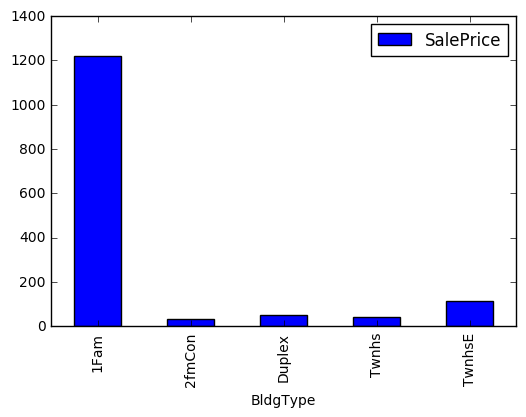

In [32]:
pd.pivot_table(data, index=['BldgType'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

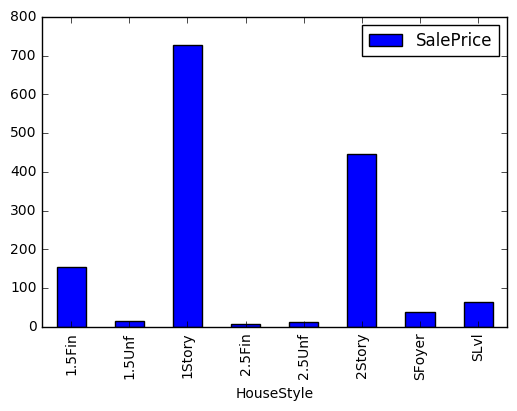

In [33]:
pd.pivot_table(data, index=['HouseStyle'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

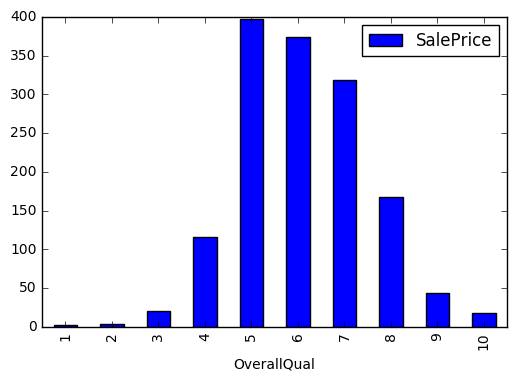

In [34]:
pd.pivot_table(data, index=['OverallQual'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

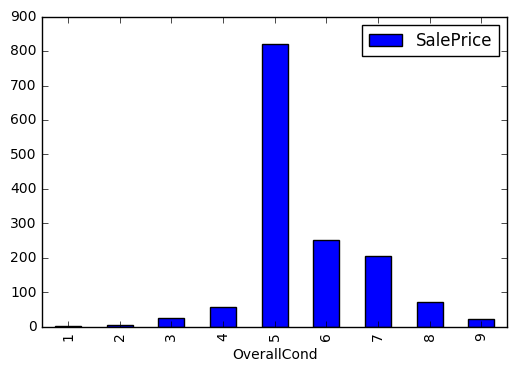

In [35]:
pd.pivot_table(data, index=['OverallCond'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

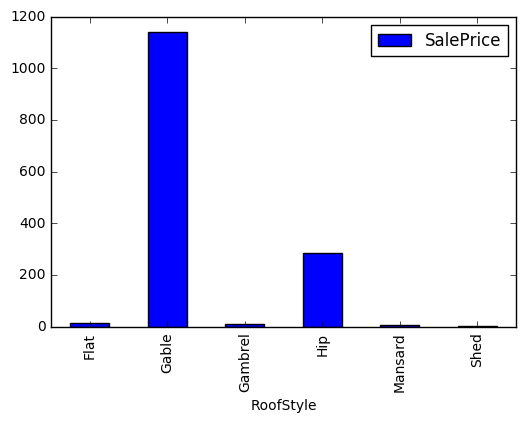

In [36]:
pd.pivot_table(data, index=['RoofStyle'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

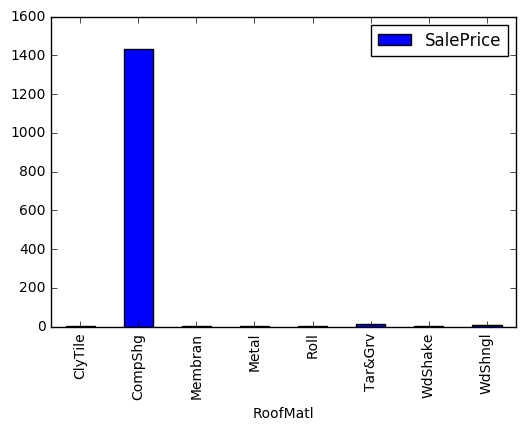

In [37]:
pd.pivot_table(data, index=['RoofMatl'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')

In [ ]:
pd.pivot_table(data, index=['RoofMatl'], values=['SalePrice'], aggfunc=np.count_nonzero).plot(kind='bar')